[ 0.1407157  -0.00590986  0.0291282   0.91105219]


/var/folders/bk/qd3mbhqj11d0grxyx8k1b1x40000gn/T/ipykernel_6031/3846517325.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = float(np.dot(w.T, now_X.T))


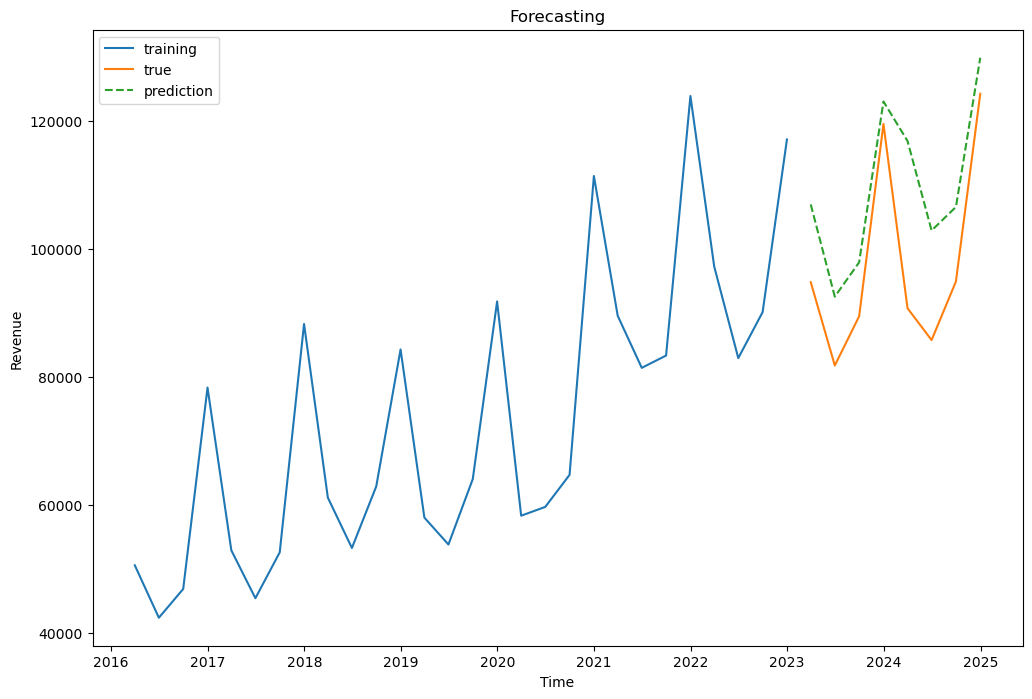

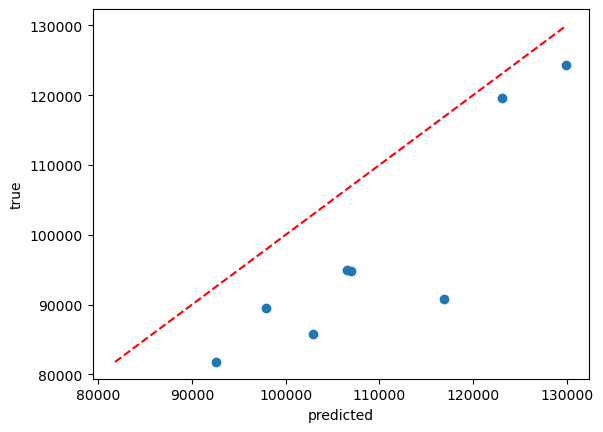

186661774.58563015 11934.253303159945 12.997214646671306


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


# data prep
apple = pd.read_csv('Apple Financial Stamt Data 24_15.csv')
apple['Quarter'] = pd.to_datetime(apple['Quarter'])
apple.sort_values(by='Quarter', inplace=True)
apple.set_index('Quarter', inplace=True)

# create 4 lags
for i in range(1, 5):
    apple[f'Lag{i}'] = apple['Revenue'].shift(i)

# drop NA's 
apple.dropna(inplace=True)

# assign x and y
X = apple[['Lag1', 'Lag2', 'Lag3', 'Lag4']].values
y = apple['Revenue'].values.reshape(-1, 1)

# train test and split
train_size = int(0.8 * len(apple))
X_train = X[:train_size]
y_train = y[:train_size]
X_test  = X[train_size:]
y_test  = y[train_size:]
test_apple = apple.index[train_size:]

# calculate w using OLS and print
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
print( w.flatten())

# initiate  y pred and start using last 4 known revenues from training data 
start = y_train[-4:].flatten().tolist()
y_pred = []


for i in range(len(y_test)):
    # reverse lag list
    now_X = np.array(start[::-1]).reshape(1, -1)
    
    # prediction, add prediction
    prediction = float(np.dot(w.T, now_X.T))
    y_pred.append(prediction)

    # update and add to lag list
    start.pop(0)
    start.append(prediction)



# plots
plt.figure(figsize=(12, 8))
plt.plot(apple.index[:train_size], apple['Revenue'].iloc[:train_size], label='training')
plt.plot(test_apple, y_test.flatten(), label='true')
plt.plot(test_apple, y_pred, label='prediction', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.title('Forecasting')
plt.legend()
plt.show()


plt.figure()
plt.scatter(y_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('true')
y_pred_new = np.array(y_pred).flatten()
y_test_new = np.array(y_test).flatten()
minimum = min(y_pred_new.min(), y_test_new.min())
maximum = max(y_pred_new.max(), y_test_new.max())
plt.plot([minimum, maximum], [minimum, maximum], 'r--')
plt.show()

# evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test_new, y_pred)
mape = mean_absolute_percentage_error(y_test_new, y_pred) * 100
print(mse, mae, mape)
